## K Nearest Neightbors
___
by: _Oskar Edén Wallberg_

A minimalistic approach to k-NN. <br>
Supports no error handling or data validation. <br>
Point is to understand the algorithm and mathematics behind it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from models.KNN import KNearestNeighbors

print(f'pd=={pd.__version__}')
print(f'np=={np.__version__}')
print(f'sns=={sns.__version__}')

pd==2.1.1
np==1.26.0
sns==0.13.0


### Import data
___
- Iris dataset

In [2]:
iris_dataset: pd.DataFrame = sns.load_dataset('iris')
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
y = iris_dataset['species']
X = iris_dataset.drop(columns=y.name)

X.shape, y.shape

((150, 4), (150,))

In [4]:
train_size = 0.8
train_mask = np.random.choice(      # random selection each run
    a=[True, False], 
    size=iris_dataset.shape[0], 
    p=(train_size, 1-train_size)
)

X_train = X[train_mask].values
y_train = y[train_mask].values

X_test = X[~train_mask].values
y_test = y[~train_mask].values

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((126, 4), (126,), (24, 4), (24,))

### Data visualization
___

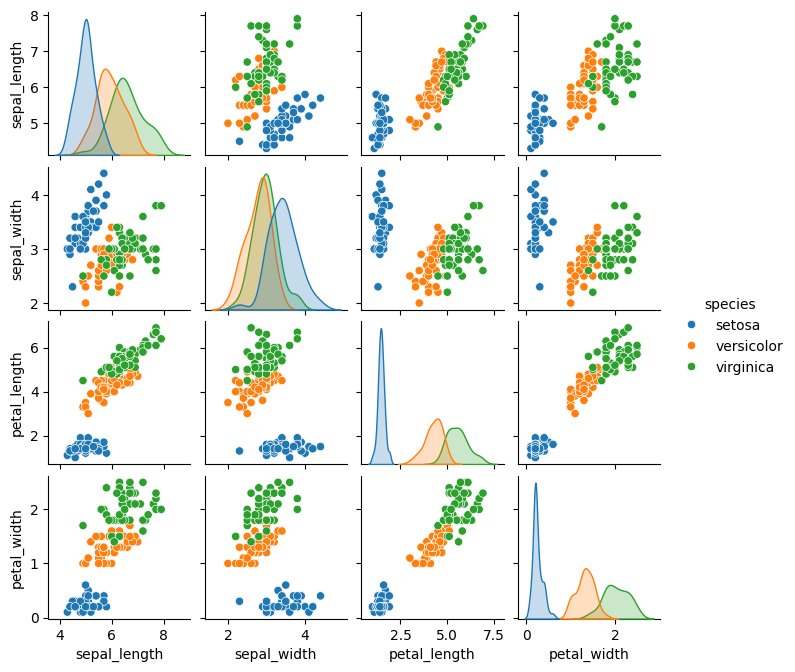

In [5]:
sns.pairplot(data=iris_dataset, hue='species', height=1.7)
plt.show()

### Create Model
___

In [6]:
# can adjust parameter int k, default is k=5
knn_clf = KNearestNeighbors()

#### - Training
___
- No training required. Data is stored inside model as reference for future datapoints.
- Is supervised.

In [7]:
knn_clf.fit(X=X_train, y=y_train)

#### - Testing
___
For each test point: <br>

- Sort train points by euclidean proximity.
- Select k nearest train points.
- Classify new datapoint by majority vote. 

_//this gets the job done but is quite inefficient._

In [8]:
y_pred = knn_clf.predict(X=X_test)

accuracy = np.sum((y_pred==y_test))/y_pred.shape[0]
print(f'Model accuracy: {accuracy}')

Model accuracy: 1.0
